# Desafío 2 - Equipo 4 
A partir del dataset resultado del TP1 vamos a construir un modelo de regresión lineal que estime el precio por m2 de las propiedades.

## Importación de datos.
## Análisis exploratorio armado de la matriz con features.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="whitegrid")

In [6]:
data = pd.read_csv('/Users/valentinaospinahernandez/Downloads/properatti.csv')
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [7]:
data_cap_federal = data[data.state_name == 'Capital Federal']

In [8]:
mask_sup_cubierta = data_cap_federal.surface_covered_in_m2 <= 400
mask_sup_total = data_cap_federal.surface_total_in_m2 <= 400
mask_combination = np.logical_and(mask_sup_cubierta,mask_sup_total)
data_cap_federal = data_cap_federal[mask_combination]

In [9]:
data_cap_federal.surface_covered_in_m2.describe()

count    24076.000000
mean        74.154926
std         58.201016
min          0.000000
25%         38.000000
50%         52.000000
75%         87.000000
max        400.000000
Name: surface_covered_in_m2, dtype: float64

In [10]:
data_cap_federal_5000 = data_cap_federal[data_cap_federal.price_usd_per_m2 <= 5000]

In [11]:
# Porcentaje de faltantes por columna

data_cap_federal_5000.isnull().sum()/data_cap_federal_5000.shape[0]

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000000
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.045211
lat-lon                       0.230908
lat                           0.230908
lon                           0.230908
price                         0.000000
currency                      0.000000
price_aprox_local_currency    0.000000
price_aprox_usd               0.000000
surface_total_in_m2           0.000000
surface_covered_in_m2         0.000000
price_usd_per_m2              0.000000
price_per_m2                  0.000100
floor                         0.933983
rooms                         0.541585
expenses                      0.732583
properati_url                 0.000000
description                   0.000000
title                         0.000000
image_thumbnail          

In [12]:
# Nos quedamos con las columnas que utilizaremos para features (place_name,surface_total_in_m2, surface_covered_in_m2, property_type)

df=pd.DataFrame(data=data_cap_federal_5000, columns=["place_name","surface_total_in_m2", "surface_covered_in_m2", "property_type", "price_usd_per_m2"])

df.shape

(19995, 5)

In [13]:
df.isnull().sum()/df.shape[0]

place_name               0.0
surface_total_in_m2      0.0
surface_covered_in_m2    0.0
property_type            0.0
price_usd_per_m2         0.0
dtype: float64

In [14]:
df.dropna(inplace=True)
df.isnull().sum()/df.shape[0]

place_name               0.0
surface_total_in_m2      0.0
surface_covered_in_m2    0.0
property_type            0.0
price_usd_per_m2         0.0
dtype: float64

In [15]:
df.shape

(19995, 5)

In [16]:
df.sample(4)

,place_name,surface_total_in_m2,surface_covered_in_m2,property_type,price_usd_per_m2
42351,Liniers,100.0,90.0,house,1600.000000
104898,Barracas,48.0,42.0,apartment,1833.333333
80574,San Telmo,47.0,44.0,apartment,2540.510638
29189,Villa Crespo,37.0,35.0,apartment,2300.000000


In [17]:
df.surface_total_in_m2.describe()

count    19995.000000
mean        85.301525
std         66.545959
min         10.000000
25%         42.000000
50%         60.000000
75%        100.000000
max        400.000000
Name: surface_total_in_m2, dtype: float64

Text(0.5, 1.0, 'Propiedades en Capital Federal (dataset reducido)')

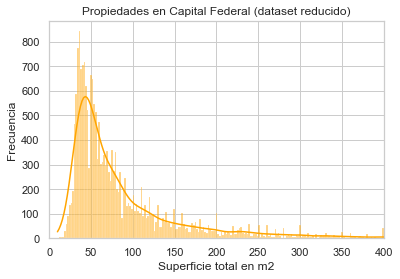

In [18]:

grafico_superficie_total=sns.histplot(df['surface_total_in_m2'], color = "orange", bins = 200, kde=True)
grafico_superficie_total.set_xlim(0,400)
grafico_superficie_total.set_xlabel('Superficie total en m2')
grafico_superficie_total.set_ylabel('Frecuencia')
grafico_superficie_total.set_title('Propiedades en Capital Federal (dataset reducido)')

In [19]:
df.surface_covered_in_m2.describe()

count    19995.000000
mean        73.169042
std         56.141989
min          0.000000
25%         38.000000
50%         52.000000
75%         85.000000
max        400.000000
Name: surface_covered_in_m2, dtype: float64

Text(0.5, 1.0, 'Propiedades en Capital Federal (dataset reducido)')

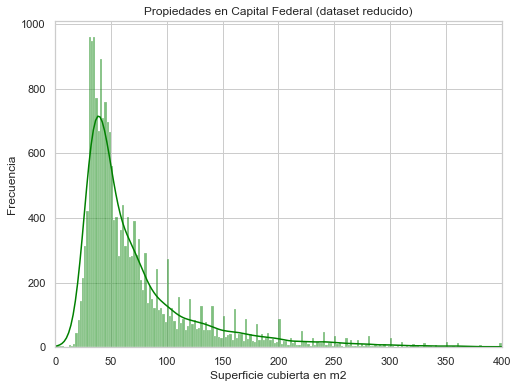

In [162]:
grafico_superficie_cubierta=sns.histplot(df['surface_covered_in_m2'], color = "green", bins = 200, kde=True)
grafico_superficie_cubierta.set_xlim(0,400)
grafico_superficie_cubierta.set_xlabel('Superficie cubierta en m2')
grafico_superficie_cubierta.set_ylabel('Frecuencia')
grafico_superficie_cubierta.set_title('Propiedades en Capital Federal (dataset reducido)')

In [21]:
df.price_usd_per_m2.describe()

count    19995.000000
mean      2478.926224
std        808.044962
min         39.950000
25%       1966.666667
50%       2419.354839
75%       2912.973072
max       5000.000000
Name: price_usd_per_m2, dtype: float64

Text(0.5, 1.0, 'Propiedades en Capital Federal (dataset reducido)')

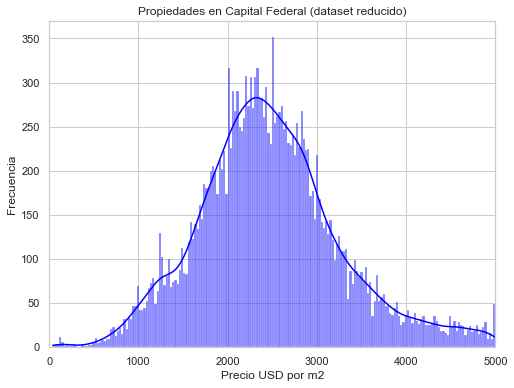

In [163]:
grafico_precio_usd=sns.histplot(df['price_usd_per_m2'], color = "blue", bins = 200, kde=True)
grafico_precio_usd.set_xlim(0,5000)
grafico_precio_usd.set_xlabel('Precio USD por m2')
grafico_precio_usd.set_ylabel('Frecuencia')
grafico_precio_usd.set_title('Propiedades en Capital Federal (dataset reducido)')

## Normalización - Transformación

In [23]:
# Normalizamos las variables de superficie usando la normalización min-max

from sklearn.preprocessing import MinMaxScaler

## Definimos la lista con las variables numericas
cuantitativas = ['surface_total_in_m2', "surface_covered_in_m2"]
y=df[cuantitativas]

## Instanciamos un scaler y le decimos al modelo que aprenda de esta lista
scaler = MinMaxScaler()
scaler.fit(y)

## Le pedimos que transforme los datos y creamos un dataframe nuevo
std_numerical_data = scaler.transform(y)
std_df = pd.DataFrame(std_numerical_data)
## Renombramos las columnas del dataframe nuevo agregando un "_std" al final para no confundirnos con los nombres del dataset anterior.
std_df.columns = [i + '_std' for i in cuantitativas]
std_df



,surface_total_in_m2_std,surface_covered_in_m2_std
0,0.115385,0.1000
1,0.115385,0.1375
2,0.089744,0.1000
3,0.141026,0.1500
4,0.102564,0.0750
...,...,...
19990,0.207692,0.1625
19991,0.071795,0.0875
19992,0.087179,0.0975
19993,0.092308,0.0975


In [24]:
# Reseteamos los index para concatenar
df.reset_index(inplace=True)

In [25]:
# Concatenamos para obtener un Data Frame final

df_final = pd.concat([df, std_df], axis = 1)
df_final

,index,place_name,surface_total_in_m2,surface_covered_in_m2,property_type,price_usd_per_m2,surface_total_in_m2_std,surface_covered_in_m2_std
0,0,Mataderos,55.0,40.0,PH,1127.272727,0.115385,0.1000
1,2,Mataderos,55.0,55.0,apartment,1309.090909,0.115385,0.1375
2,7,Belgrano,45.0,40.0,apartment,3066.666667,0.089744,0.1000
3,8,Belgrano,65.0,60.0,apartment,3000.000000,0.141026,0.1500
4,13,Palermo Soho,50.0,30.0,apartment,2234.000000,0.102564,0.0750
...,...,...,...,...,...,...,...,...
19990,121153,Barrio Norte,91.0,65.0,apartment,1813.186813,0.207692,0.1625
19991,121157,Belgrano,38.0,35.0,apartment,3368.421053,0.071795,0.0875
19992,121158,Recoleta,44.0,39.0,apartment,3750.000000,0.087179,0.0975
19993,121217,Villa Urquiza,46.0,39.0,apartment,2858.695652,0.092308,0.0975


In [26]:
df_final=df_final.drop(columns=['index'])


In [27]:
df_final.head(4)

,place_name,surface_total_in_m2,surface_covered_in_m2,property_type,price_usd_per_m2,surface_total_in_m2_std,surface_covered_in_m2_std
0,Mataderos,55.0,40.0,PH,1127.272727,0.115385,0.1000
1,Mataderos,55.0,55.0,apartment,1309.090909,0.115385,0.1375
2,Belgrano,45.0,40.0,apartment,3066.666667,0.089744,0.1000
3,Belgrano,65.0,60.0,apartment,3000.000000,0.141026,0.1500


In [28]:
df_final.shape

(19995, 7)

In [29]:
# Aplicamos escala logaritmica a la columna de price_usd_per_m2

df_final['price_usd_per_m2_log2']=np.log2(df_final['price_usd_per_m2'])
df_final.head(4)

,place_name,surface_total_in_m2,surface_covered_in_m2,property_type,price_usd_per_m2,surface_total_in_m2_std,surface_covered_in_m2_std,price_usd_per_m2_log2
0,Mataderos,55.0,40.0,PH,1127.272727,0.115385,0.1000,10.138621
1,Mataderos,55.0,55.0,apartment,1309.090909,0.115385,0.1375,10.354350
2,Belgrano,45.0,40.0,apartment,3066.666667,0.089744,0.1000,11.582456
3,Belgrano,65.0,60.0,apartment,3000.000000,0.141026,0.1500,11.550747


Text(0.5, 1.0, 'Propiedades en Capital Federal (dataset reducido)')

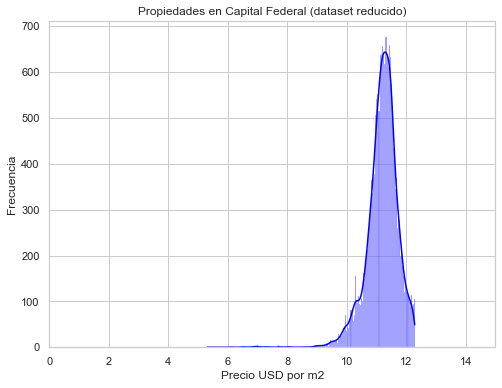

In [164]:
grafico_precio_usd_log=sns.histplot(df_final['price_usd_per_m2_log2'], color = "blue", bins = 200, kde=True)
grafico_precio_usd_log.set_xlim(0,15)
grafico_precio_usd_log.set_xlabel('Precio USD por m2')
grafico_precio_usd_log.set_ylabel('Frecuencia')
grafico_precio_usd_log.set_title('Propiedades en Capital Federal (dataset reducido)')

In [31]:
# Eliminamos los registros que tienen 'Capital Federal' como place_name

df_2 = df_final.loc[df_final.place_name != "Capital Federal"]

In [32]:
df_2.isnull().sum()

place_name                   0
surface_total_in_m2          0
surface_covered_in_m2        0
property_type                0
price_usd_per_m2             0
surface_total_in_m2_std      0
surface_covered_in_m2_std    0
price_usd_per_m2_log2        0
dtype: int64

In [33]:
df_2.shape

(19551, 8)

## Creación de variables dummies

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
# Crear dummies a partir de datos categoricos de un dataset con OneHotEncoder
## Separo las variables features
categorical= ["property_type", "place_name"]
x=df_2[categorical]

## instanciamos la clase OnoHotEncoder y le decimos que represente las variables categoricas como N-1
enc = OneHotEncoder(drop='first')

## Le decimos que aprenda de nuestros datos cuales son las categorias disponibles
enc.fit(x)
## Vemos cuales son las categorias definidas (las muestra en objeto array)
enc.categories_

## Con estas categorias, transformamos a X y lo convertimos en un array
dummies = enc.transform(x).toarray()

## lo convertimos a un dataframe, pero como perdimos los nombres de las categorias, les pongo estos nombres.
dummies_df = pd.DataFrame(dummies)
col_names = [categorical[i] + '_' + enc.categories_[i] for i in range(len(categorical)) ]
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
dummies_df.columns = col_names_drop_first

In [36]:
dummies_df.head(10)

,property_type_apartment,property_type_house,property_type_store,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boca,...,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
dummies_df.shape

(19551, 63)

In [38]:
dummies_df.isnull().sum()

property_type_apartment        0
property_type_house            0
property_type_store            0
place_name_Agronomía           0
place_name_Almagro             0
                              ..
place_name_Villa Riachuelo     0
place_name_Villa Santa Rita    0
place_name_Villa Soldati       0
place_name_Villa Urquiza       0
place_name_Villa del Parque    0
Length: 63, dtype: int64

In [39]:
df_2.reset_index(inplace=True)
dummies_df.reset_index(inplace=True)

In [40]:
# Unir datasets

df_final = df_2.merge(right=dummies_df, how="left", right_index=True, left_index=True)
df_final.shape

(19551, 73)

In [41]:
df_final.sample(10)

,index_x,place_name,surface_total_in_m2,surface_covered_in_m2,property_type,price_usd_per_m2,surface_total_in_m2_std,surface_covered_in_m2_std,price_usd_per_m2_log2,index_y,...,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque
2743,2804,Villa Devoto,39.0,35.0,apartment,2176.923077,0.074359,0.0875,11.088075,2743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4810,4907,Boedo,20.0,20.0,apartment,2195.000000,0.025641,0.0500,11.100005,4810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6763,6904,Palermo,164.0,123.0,apartment,2198.207134,0.394872,0.3075,11.102112,6763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3057,3126,Barrio Norte,74.0,74.0,apartment,2432.432432,0.164103,0.1850,11.248184,3057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16603,16957,Nuñez,82.0,78.0,apartment,2378.048780,0.184615,0.1950,11.215563,16603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16856,17233,Nuñez,69.0,55.0,PH,2173.913043,0.151282,0.1375,11.086079,16856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11754,11970,Nuñez,120.0,50.0,apartment,1316.666667,0.282051,0.1250,10.362674,11754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9574,9740,Villa Luro,40.0,40.0,apartment,2075.000000,0.076923,0.1000,11.018896,9574,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,513,Caballito,144.0,147.0,apartment,1944.444444,0.343590,0.3675,10.925142,493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9155,9319,Belgrano,94.0,94.0,apartment,2925.531915,0.215385,0.2350,11.514483,9155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_final.drop(columns=['index_x', 'index_y'], inplace=True)

In [43]:
df_final.head(3)

,place_name,surface_total_in_m2,surface_covered_in_m2,property_type,price_usd_per_m2,surface_total_in_m2_std,surface_covered_in_m2_std,price_usd_per_m2_log2,property_type_apartment,property_type_house,...,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque
0,Mataderos,55.0,40.0,PH,1127.272727,0.115385,0.1000,10.138621,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mataderos,55.0,55.0,apartment,1309.090909,0.115385,0.1375,10.354350,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Belgrano,45.0,40.0,apartment,3066.666667,0.089744,0.1000,11.582456,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_final.shape

(19551, 71)

In [45]:
df_final.isnull().sum()

place_name                     0
surface_total_in_m2            0
surface_covered_in_m2          0
property_type                  0
price_usd_per_m2               0
                              ..
place_name_Villa Riachuelo     0
place_name_Villa Santa Rita    0
place_name_Villa Soldati       0
place_name_Villa Urquiza       0
place_name_Villa del Parque    0
Length: 71, dtype: int64

## Visualización

In [46]:
%matplotlib inline

# Definimos parámetros globales para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 16

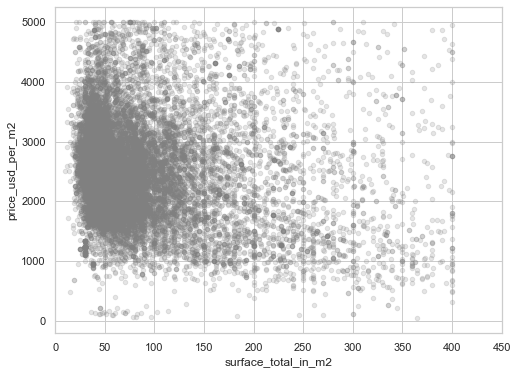

In [126]:
# Ploteamos puntos con Pandas
df_final.plot(kind='scatter', x='surface_total_in_m2', y='price_usd_per_m2', c='grey', alpha=0.2, xlim=(0, 450));

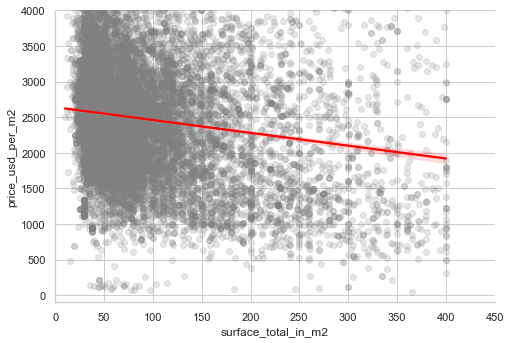

In [129]:
# Ajuste con Seaborn (modelo lineal) 
g=sns.lmplot(x='surface_total_in_m2', y='price_usd_per_m2', data=df_final, aspect=1.45,\
                                scatter_kws={'alpha':0.2, 'color': 'grey'}, line_kws={'color': 'red'});
                                
g.set(xlim=(0,450))
g.set(ylim=(-100,4000))

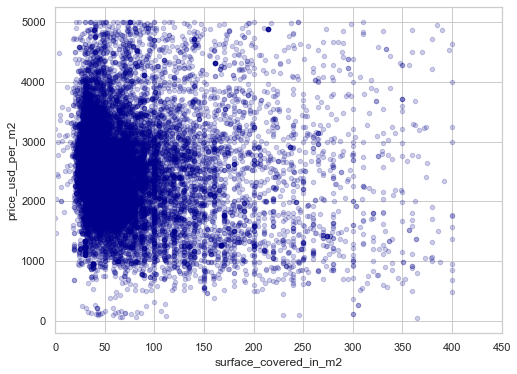

In [133]:
# Ploteamos puntos con Pandas
df_final.plot(kind='scatter', x='surface_covered_in_m2', y='price_usd_per_m2', c='darkblue' ,alpha=0.2, xlim=(0, 450));

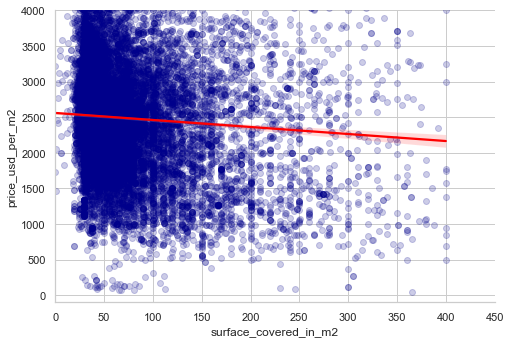

In [134]:
# Ajuste con Seaborn (modelo lineal) 
g2=sns.lmplot(x='surface_covered_in_m2', y='price_usd_per_m2', data=df_final, aspect=1.45,\
                                scatter_kws={'alpha':0.2, 'color': 'darkblue'}, line_kws={'color': 'red'});
                                
g2.set(xlim=(0,450))
g2.set(ylim=(-100,4000))

In [51]:
# Matriz de correlación

df_final.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2']].corr()

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2
surface_total_in_m2,1.000000,0.943270,-0.147203
surface_covered_in_m2,0.943270,1.000000,-0.068479
price_usd_per_m2,-0.147203,-0.068479,1.000000


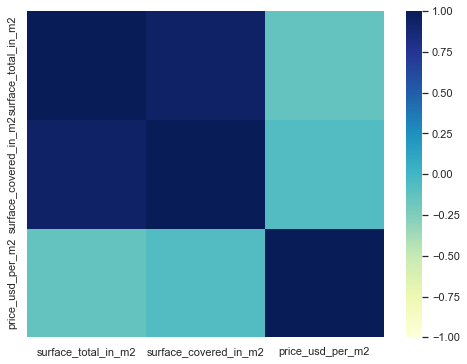

In [52]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap

sns.heatmap(df_final.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2']].corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

## Modelado - Regresión Lineal Simple

### Modelo 1 - Superficie Total en m2

In [143]:
# importamos el modelo lineal 

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [144]:
# Seleccionamos la variable predictora y la objetivo

X = df_final[['surface_total_in_m2_std']]
y = df_final.price_usd_per_m2_log2

# Instanciamos el modelo.
lm = linear_model.LinearRegression()

# Fiteamos el modelo sobre los vectores X , y.
model = lm.fit(X, y)

# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions = lm.predict(X)

# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado
print ('Intercepto=', ' ', model.intercept_)
print ('surface_total_in_m2_std=', ' ', model.coef_)

Intercepto=   11.333060956713789
surface_total_in_m2_std=   [-0.71951968]


In [145]:
# Definimos una función que acepta una lista de features, hace el split entre train y test,
# reservando un 25% de las observaciones para testeo, y devuelve la prueba RMSE.

from sklearn.model_selection import train_test_split

def train_test_rmse(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [146]:
# Misma función pero devuelve el R2

def train_test_r2(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return metrics.r2_score(y_test, y_pred)

In [147]:
X1 = df_final['surface_total_in_m2_std'].values.reshape(-1,1)
y1 = df_final.price_usd_per_m2_log2.values.reshape(-1,1)
print(f"R2 para modelo 1: {train_test_r2(X,y)}")
print(f"RMSE para modelo 1: {train_test_rmse(X,y)}")

R2 para modelo 1: 0.003120903079084192
RMSE para modelo 1: 0.5055992667303151


### Grafica modelo 1

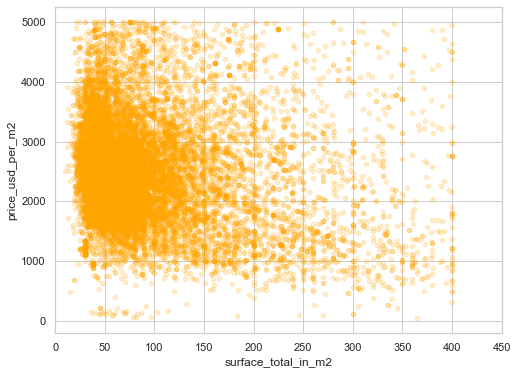

In [150]:
# Graficamos la variable X contra la variable Y (modelo1)
df_final.plot(kind='scatter', x='surface_total_in_m2', y='price_usd_per_m2', c='orange', alpha=0.2, xlim=(0, 450));

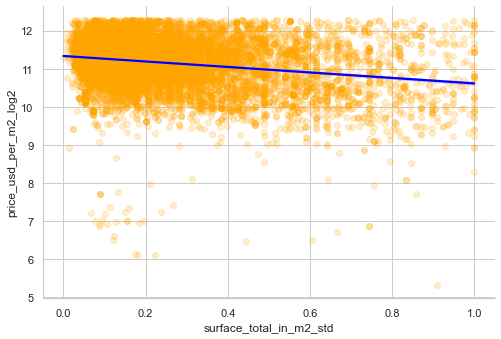

In [152]:
# Ajuste con Seaborn (modelo lineal) 
gm2=sns.lmplot(x='surface_total_in_m2_std', y='price_usd_per_m2_log2', data=df_final, aspect=1.45,\
                                scatter_kws={'alpha':0.2, 'color': 'orange'}, line_kws={'color': 'blue'})

## Modelo 2 - Variable Superficie cubierta en m2

In [60]:
# Seleccionamos la variable predictora y la objetivo

X2 = df_final[['surface_covered_in_m2_std']]
y2 = df_final.price_usd_per_m2_log2

# Instanciamos el modelo.
lm = linear_model.LinearRegression()

# Fiteamos el modelo sobre los vectores X , y.
model = lm.fit(X2, y2)

# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_covered = lm.predict(X2)

# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado
print ('Intercepto=', ' ', model.intercept_)
print ('surface_covered_in_m2_std=', ' ', model.coef_)

# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train=', ' ', model.score(X2, y2))

Intercepto=   11.291364072430493
surface_covered_in_m2_std=   [-0.52815432]
R2_train=   0.019404942629296262


In [61]:
X2 = df_final['surface_covered_in_m2_std'].values.reshape(-1,1)
y2 = df_final.price_usd_per_m2_log2.values.reshape(-1,1)
print(f"R2 para modelo 2: {train_test_r2(X2,y2)}")
print(f"RMSE para modelo 2: {train_test_rmse(X2,y2)}")

R2 para modelo 2: -0.018899507015732064
RMSE para modelo 2: 0.5111529442521


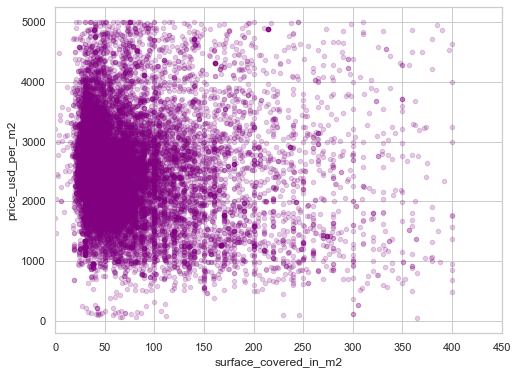

In [153]:
# Graficamos la variable X contra la variable Y (modelo2)
df_final.plot(kind='scatter', x='surface_covered_in_m2', y='price_usd_per_m2', c='purple' ,alpha=0.2, xlim=(0, 450));

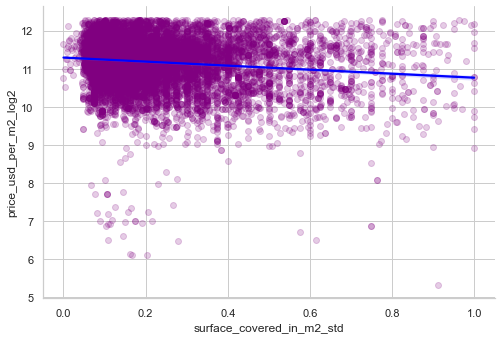

In [154]:
# Ajuste con Seaborn (modelo lineal) 
gm2=sns.lmplot(x='surface_covered_in_m2_std', y='price_usd_per_m2_log2', data=df_final, aspect=1.45,\
                                scatter_kws={'alpha':0.2, 'color': 'purple'}, line_kws={'color': 'blue'})
                                

## Modelo 3- Variable Dummies (apartamentos)

In [64]:
# Seleccionamos la variable predictora y la objetivo

X3 = dummies_df[['property_type_apartment']]
y3 = df_final.price_usd_per_m2_log2

# Instanciamos el modelo.
lm = linear_model.LinearRegression()

# Fiteamos el modelo sobre los vectores X , y.
model = lm.fit(X3, y3)

# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_apartment = lm.predict(X3)

# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado
print ('Intercepto=', ' ', model.intercept_)
print ('property_type_apartment=', ' ', model.coef_)

# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train=', ' ', model.score(X3, y3))

Intercepto=   10.68892052481048
property_type_apartment=   [0.57845187]
R2_train=   0.1297564333450938


In [65]:
x3 = dummies_df['property_type_apartment'].values.reshape(-1,1)
y3 = df_final.price_usd_per_m2_log2.values.reshape(-1,1)
print(f"R2 para modelo 3: {train_test_r2(X3,y3)}")
print(f"RMSE para modelo 3: {train_test_rmse(X3,y3)}")

R2 para modelo 3: 0.10156915192802773
RMSE para modelo 3: 0.47998483729191704


## Datasets reducidos 

### Modelo 4 - Solo Apartamentos en (5) barrios

In [66]:
df_final.property_type.value_counts()

apartment    17108
PH            1166
house          695
store          582
Name: property_type, dtype: int64

In [67]:
df_m4 = df_final[((df_final.place_name=='Belgrano') | (df_final.place_name=='Palermo')| (df_final.place_name=='Caballito')  | (df_final.place_name=='Villa Crespo') | (df_final.place_name=='San Telmo')) & (df_final.property_type=='apartment')]
df_m4.place_name.value_counts()

Belgrano        1770
Palermo         1521
Caballito       1521
San Telmo        901
Villa Crespo     862
Name: place_name, dtype: int64

In [68]:
# Seleccionamos la variable predictora y la objetivo

X4 = df_m4 [['surface_total_in_m2_std']]
y4 = df_m4 .price_usd_per_m2_log2

print(f"R2 para modelo 4: {train_test_r2(X4,y4)}")
print(f"RMSE para modelo 4: {train_test_rmse(X4,y4)}")

R2 para modelo 4: -0.02096803232366673
RMSE para modelo 4: 0.376882315536332


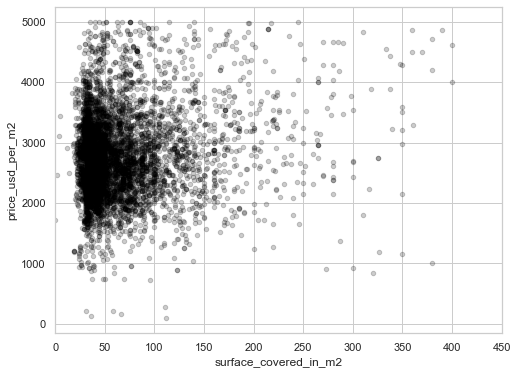

In [156]:
# Graficamos la variable X contra la variable Y (modelo4)
df_m4.plot(kind='scatter', x='surface_covered_in_m2', y='price_usd_per_m2', c='black' ,alpha=0.2, xlim=(0, 450));

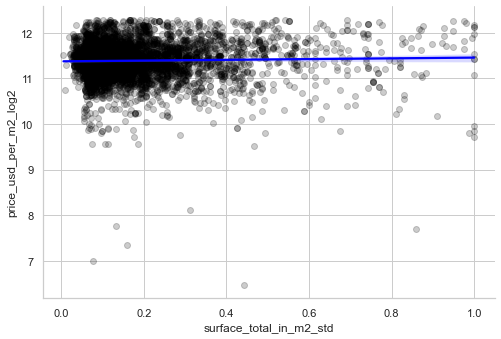

In [70]:
# Ajuste con Seaborn (modelo lineal 4) 
gm4=sns.lmplot(x='surface_total_in_m2_std', y='price_usd_per_m2_log2', data=df_m4, aspect=1.45,\
                                scatter_kws={'alpha':0.2, 'color': 'black'}, line_kws={'color': 'blue'})

## Comparación de Modelos de Regresión Lineal Simple

### M1:

R2:  0.003120903079084192

RMSE:  0.5055992667303151

----------

### M2:

R2:  -0.018899507015732064

RMSE:  0.5111529442521

----------


### M3:

R2:  0.1015691519280284

RMSE:  0.4799848372919169

----------

### M4:

R2:  -0.020968032323666952


RMSE:  0.376882315536332

## Modelado - Regresión Lineal Múltiple

### Modelo 1 - Variables continuas (superficie total y superficie cubierta)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [72]:
# creamos lista de features

feature_cols = ['surface_total_in_m2', 'surface_covered_in_m2']

# creamos X and y
X = df_final[feature_cols]
y = df_final.price_usd_per_m2_log2

# creamos el modelo y fiteamos
linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)
list(zip(feature_cols, linreg.coef_))

11.318779438206265
[-0.00713556  0.00660092]


[('surface_total_in_m2', -0.007135556383069359),
 ('surface_covered_in_m2', 0.006600916508723229)]

#### Train/Test Split y métricas RMSE y R2

In [73]:
# Definimos una función que acepta una matriz de features y un vector de variable target, hace el split entre train y test,
# reservando un 25% de las observaciones para testeo, y devuelve la prueba RMSE.

from sklearn.model_selection import train_test_split

def train_test_rmse(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [74]:
# Misma función pero devuelve el R2

def train_test_r2(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return metrics.r2_score(y_test, y_pred)

In [75]:
X1 = df_final[feature_cols]
y1 = df_final.price_usd_per_m2_log2
print(f"R2 para modelo 1: {train_test_r2(X1,y1)}")
print(f"RMSE para modelo 1: {train_test_rmse(X1,y1)}")

R2 para modelo 1: 0.053441123902966736
RMSE para modelo 1: 0.49267327740811695


In [76]:
# Modelo 1_1 - Con variables de superficie normalizadas

feature_cols_1_1 = ['surface_total_in_m2_std', 'surface_covered_in_m2_std']
X1_1 = df_final[feature_cols_1_1]
y1_1 = df_final.price_usd_per_m2_log2
print(f"R2 para modelo 1_1: {train_test_r2(X1_1,y1_1)}")
print(f"RMSE para modelo 1_1: {train_test_rmse(X1_1,y1_1)}")

R2 para modelo 1_1: 0.05344112390296707
RMSE para modelo 1_1: 0.4926732774081169


### Modelo 2 - Variables Dummies

In [77]:
feature_cols_2 = ['property_type_apartment','property_type_house','property_type_store'] # La categoría eliminada de las dummies fue 'PH'

# creamos X and y
X2 = dummies_df[feature_cols_2]
y2 = df_final.price_usd_per_m2_log2

# creamos el modelo y fiteamos
linreg2 = LinearRegression()
linreg2.fit(X2, y2)

# Imprimimos coeficientes
print (linreg2.intercept_)
print (linreg2.coef_)
list(zip(feature_cols_2, linreg2.coef_))

10.630041644084484
[ 0.63733075 -0.10504466  0.37258959]


[('property_type_apartment', 0.6373307504390704),
 ('property_type_house', -0.10504465744971092),
 ('property_type_store', 0.37258959199512415)]

In [78]:
print(f"R2 para modelo 2: {train_test_r2(X2,y2)}")
print(f"RMSE para modelo 2: {train_test_rmse(X2,y2)}")

R2 para modelo 2: 0.1130465507348839
RMSE para modelo 2: 0.47690909422809513


### Modelos 3 y 4 - Variables dummies 'place_name'

In [79]:
feature_cols_3 = ['place_name_Palermo', 'place_name_Almagro', 'place_name_San Telmo'] # la categoría eliminada fue 'Abasto'

# creamos X and y
X3 = dummies_df[feature_cols_3]
y3 = df_final.price_usd_per_m2_log2

# creamos el modelo y fiteamos
linreg3 = LinearRegression()
linreg3.fit(X3, y3)

# Imprimimos coeficientes
print (linreg3.intercept_)
print (linreg3.coef_)
list(zip(feature_cols_3, linreg3.coef_))

11.172058898915378
[ 0.34782627 -0.11424472 -0.04194766]


[('place_name_Palermo', 0.3478262700364831),
 ('place_name_Almagro', -0.11424472027741372),
 ('place_name_San Telmo', -0.041947660791806604)]

In [80]:
print(f"R2 para modelo 3: {train_test_r2(X3,y3)}")
print(f"RMSE para modelo 3: {train_test_rmse(X3,y3)}")

R2 para modelo 3: 0.005812911989795055
RMSE para modelo 3: 0.504916135819885


Modelo 4 - Todas las categorías de 'place_name'

In [81]:
dummies_place_name=dummies_df.drop(columns=['property_type_apartment','property_type_house','property_type_store'])

# creamos X and y
X4 = dummies_place_name
y4 = df_final.price_usd_per_m2_log2

# creamos el modelo y fiteamos
linreg4 = LinearRegression()
linreg4.fit(X4, y4)

# Imprimimos coeficientes
print (linreg4.intercept_)
print (linreg4.coef_)
list(zip(dummies_place_name.columns, linreg4.coef_))

10.915525924900319
[ 7.58460755e-06  5.04565015e-02  7.86207296e-02 -1.26407950e-01
 -1.60036982e-01  4.84505535e-01  5.19192861e-01 -3.99198204e-01
 -2.41677360e-01  2.26809811e-01 -7.83291193e-02  5.09405058e-02
  5.02785917e-02  2.35639085e-01  2.43268250e-01 -2.08433517e-01
 -2.22507110e-01 -5.56209029e-02 -2.97208297e-01  7.18648158e-01
 -2.51392283e-01 -5.56246336e-01 -4.07761838e-02 -1.80344182e-01
  4.22346670e-01 -2.34541891e-01  5.25228209e-01  9.15329815e-01
  5.43036737e-01  5.43644577e-01  5.04776185e-01 -6.39265062e-01
  1.44515121e-01 -3.65062277e-01  1.37368185e-02 -2.58029229e-01
 -1.37255140e-01 -9.39642424e-01  1.10675943e+00  5.92464479e-01
  4.03960565e-01  1.69894816e-01 -1.09137814e-01  6.39527831e-02
  1.21431416e-01 -3.04589402e-02 -4.01157795e-01 -3.62499137e-01
  2.27007240e-01  3.79427261e-02 -1.67045414e-01 -8.47982342e-01
 -4.04771015e-02  1.39282640e-01 -1.08266171e-01 -5.34940330e-01
 -8.78540840e-01 -9.77690066e-02 -1.07586535e+00  2.28388398e-01
  8.32

[('index', 7.5846075463901e-06),
 ('place_name_Agronomía', 0.050456501546484844),
 ('place_name_Almagro', 0.07862072955812342),
 ('place_name_Balvanera', -0.12640794987523668),
 ('place_name_Barracas', -0.1600369819724204),
 ('place_name_Barrio Norte', 0.48450553546251496),
 ('place_name_Belgrano', 0.5191928605426959),
 ('place_name_Boca', -0.39919820361303393),
 ('place_name_Boedo', -0.2416773598735184),
 ('place_name_Caballito', 0.2268098113451661),
 ('place_name_Catalinas', -0.07832911925344388),
 ('place_name_Centro / Microcentro', 0.050940505807167635),
 ('place_name_Chacarita', 0.05027859171995322),
 ('place_name_Coghlan', 0.23563908536916897),
 ('place_name_Colegiales', 0.24326824995264235),
 ('place_name_Congreso', -0.20843351686792602),
 ('place_name_Constitución', -0.22250710966393114),
 ('place_name_Flores', -0.0556209029163629),
 ('place_name_Floresta', -0.2972082965779849),
 ('place_name_Las Cañitas', 0.718648158270292),
 ('place_name_Liniers', -0.25139228345955184),
 ('pl

In [82]:
print(f"R2 para modelo 4: {train_test_r2(X4,y4)}")
print(f"RMSE para modelo 4: {train_test_rmse(X4,y4)}")

R2 para modelo 4: 0.23997798876490084
RMSE para modelo 4: 0.4414670309529382


## Modelos con Datasets reducidos

### Modelo 5 - Dataset con tres (3) barrios y solo apartamentos

In [83]:
df_final.property_type.value_counts()

apartment    17108
PH            1166
house          695
store          582
Name: property_type, dtype: int64

In [84]:
df_final.head(3)

,place_name,surface_total_in_m2,surface_covered_in_m2,property_type,price_usd_per_m2,surface_total_in_m2_std,surface_covered_in_m2_std,price_usd_per_m2_log2,property_type_apartment,property_type_house,...,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque
0,Mataderos,55.0,40.0,PH,1127.272727,0.115385,0.1000,10.138621,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mataderos,55.0,55.0,apartment,1309.090909,0.115385,0.1375,10.354350,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Belgrano,45.0,40.0,apartment,3066.666667,0.089744,0.1000,11.582456,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df_final.place_name.value_counts()

Belgrano           1867
Palermo            1664
Caballito          1624
Villa Urquiza      1055
Recoleta           1053
                   ... 
Velez Sarsfield      23
Parque Chas          14
Villa Soldati         4
Villa Riachuelo       3
Catalinas             1
Name: place_name, Length: 61, dtype: int64

In [86]:
df_3 = df_final[((df_final.place_name=='Belgrano') | (df_final.place_name=='Villa Crespo') | (df_final.place_name=='San Telmo')) & (df_final.property_type=='apartment')]
df_3.place_name.value_counts()

Belgrano        1770
San Telmo        901
Villa Crespo     862
Name: place_name, dtype: int64

In [87]:
df_3.shape

(3533, 71)

In [88]:
df_3.property_type.value_counts()

apartment    3533
Name: property_type, dtype: int64

In [89]:
# Modelo 5

feature_cols_5 = ['surface_total_in_m2', 'surface_covered_in_m2']

# creamos X and y
X5 = df_3[feature_cols_5]
y5 = df_3.price_usd_per_m2_log2

print(f"R2 para modelo 5: {train_test_r2(X5,y5)}")
print(f"RMSE para modelo 5: {train_test_rmse(X5,y5)}")

R2 para modelo 5: 0.02109234637054469
RMSE para modelo 5: 0.36135353904095063


In [90]:
# Modelo 5_1 - Con variables de superficie normalizadas

feature_cols_5_1 = ['surface_total_in_m2_std', 'surface_covered_in_m2_std']

# creamos X and y
X5_1 = df_3[feature_cols_5]
y5_1 = df_3.price_usd_per_m2_log2

print(f"R2 para modelo 5_1: {train_test_r2(X5_1,y5_1)}")
print(f"RMSE para modelo 5_1: {train_test_rmse(X5_1,y5_1)}")

R2 para modelo 5_1: 0.02109234637054469
RMSE para modelo 5_1: 0.36135353904095063


## Modelos con correcta preparación de datos:

La normalización 'Min-Max Scaler' (aplicada a las variables de superficie) se aplicará solo al dataset de Training, luego de haber realizado Train-Test Split, y no a todo el dataset en su conjunto.

In [91]:
def modelado_rmse(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    # ajustar the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # metrica
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [92]:
def modelado_r2(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    # ajustar the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # metrica
    return metrics.r2_score(y_test, y_pred)

In [93]:
# Modelo 5_3: Modelo 5 usando función 'modelado'

feature_cols_5 = ['surface_total_in_m2', 'surface_covered_in_m2']

# creamos X and y
X5_3 = df_3[feature_cols_5]
y5_3 = df_3.price_usd_per_m2_log2
print(f"RMSE para modelo 5_3: {modelado_rmse(X5_3, y5_3)}")
print(f"R2 para modelo 5_3: {modelado_r2(X5_3, y5_3)}")

RMSE para modelo 5_3: 0.36135353904095063
R2 para modelo 5_3: 0.021092346370544912


In [94]:
# Modelo 1_2

feature_cols_1_2 = ['surface_total_in_m2', 'surface_covered_in_m2']
X1_2 = df_final[feature_cols_1_2]
y1_2 = df_final.price_usd_per_m2_log2
print(f"RMSE para modelo 1_2: {modelado_rmse(X1_2, y1_2)}")
print(f"R2 para modelo 1_2: {modelado_r2(X1_2, y1_2)}")

RMSE para modelo 1_2: 0.4926732774081169
R2 para modelo 1_2: 0.05344112390296707


## Modelo con información de número de habitaciones

### Creación de variable dummie: categorías de número de habitaciones

In [95]:
df_ex=pd.DataFrame(data=data_cap_federal_5000, columns=["place_name","surface_total_in_m2", "surface_covered_in_m2", "property_type", "price_usd_per_m2", "rooms"])
df_ex.dropna(inplace=True)
df_ex.isnull().sum()/df_ex.shape[0]

place_name               0.0
surface_total_in_m2      0.0
surface_covered_in_m2    0.0
property_type            0.0
price_usd_per_m2         0.0
rooms                    0.0
dtype: float64

In [96]:
df_ex.shape

(9166, 6)

In [97]:
df_ex.head(3)

,place_name,surface_total_in_m2,surface_covered_in_m2,property_type,price_usd_per_m2,rooms
13,Palermo Soho,50.0,30.0,apartment,2234.000000,1.0
14,Palermo Soho,42.0,31.0,apartment,3521.428571,1.0
16,Mataderos,140.0,98.0,PH,1707.142857,4.0


In [98]:
# Aplicamos escala logaritmica (logaritmo base 2) a la columna de price_usd_per_m2

df_ex['price_usd_per_m2_log2']=np.log2(df_ex['price_usd_per_m2'])

In [99]:
df_ex.head(3)

,place_name,surface_total_in_m2,surface_covered_in_m2,property_type,price_usd_per_m2,rooms,price_usd_per_m2_log2
13,Palermo Soho,50.0,30.0,apartment,2234.000000,1.0,11.125413
14,Palermo Soho,42.0,31.0,apartment,3521.428571,1.0,11.781945
16,Mataderos,140.0,98.0,PH,1707.142857,4.0,10.737368


In [100]:
df_ex.rooms.value_counts()

1.0     2278
3.0     2264
2.0     2153
4.0     1621
5.0      571
6.0      162
7.0       78
8.0       22
10.0       5
12.0       5
9.0        4
11.0       2
14.0       1
Name: rooms, dtype: int64

In [101]:
## Vamos a agrupar la variable Número de habitaciones de la siguiente forma:

# Defino los valores de corte
bins_rooms = [1, 2, 3, 4, 5, 6, 15]
rooms_labels = ['1 habitación', '2 habitaciones', '3 habitaciones', '4 habitaciones', '5 habitaciones', '6 o más habitaciones' ]

rooms_cat = pd.cut(df_ex.rooms, bins_rooms, labels=rooms_labels, right=False)
rooms_cat.dtype

CategoricalDtype(categories=['1 habitación', '2 habitaciones', '3 habitaciones',
                  '4 habitaciones', '5 habitaciones', '6 o más habitaciones'],
, ordered=True)

In [102]:
list_1_hab = [1.0 if df_ex.rooms.iloc[i]==1.0 else 0.0 for i in range(len(df_ex))]
print(len(list_1_hab))

list_2_hab = [1.0 if df_ex.rooms.iloc[i]==2.0 else 0.0 for i in range(len(df_ex))]
print(len(list_2_hab))

list_3_hab = [1.0 if df_ex.rooms.iloc[i]==3.0 else 0.0 for i in range(len(df_ex))]
print(len(list_3_hab))

list_4_hab = [1.0 if df_ex.rooms.iloc[i]==4.0 else 0.0 for i in range(len(df_ex))]
print(len(list_4_hab))

list_5_hab = [1.0 if df_ex.rooms.iloc[i]==5.0 else 0.0 for i in range(len(df_ex))]
print(len(list_5_hab))

list_6_hab = [1.0 if df_ex.rooms.iloc[i] in range(6,16) else 0.0 for i in range(len(df_ex))]
print(len(list_6_hab))


9166
9166
9166
9166
9166
9166


In [103]:
df_ex.reset_index(inplace=True)
df_ex.drop(columns=['index'], inplace=True)

In [104]:
df_ex['1_habitacion']=pd.Series(list_1_hab)
df_ex['2_habitaciones']=pd.Series(list_2_hab)
df_ex['3_habitaciones']=pd.Series(list_3_hab)
df_ex['4_habitaciones']=pd.Series(list_4_hab)
df_ex['5_habitaciones']=pd.Series(list_5_hab)
df_ex['6_o_mas_habitaciones']=pd.Series(list_6_hab)

In [105]:
df_ex.head(10)

,place_name,surface_total_in_m2,surface_covered_in_m2,property_type,price_usd_per_m2,rooms,price_usd_per_m2_log2,1_habitacion,2_habitaciones,3_habitaciones,4_habitaciones,5_habitaciones,6_o_mas_habitaciones
0,Palermo Soho,50.0,30.0,apartment,2234.000000,1.0,11.125413,1.0,0.0,0.0,0.0,0.0,0.0
1,Palermo Soho,42.0,31.0,apartment,3521.428571,1.0,11.781945,1.0,0.0,0.0,0.0,0.0,0.0
2,Mataderos,140.0,98.0,PH,1707.142857,4.0,10.737368,0.0,0.0,0.0,1.0,0.0,0.0
3,Palermo,104.0,96.0,apartment,3365.384615,3.0,11.716556,0.0,0.0,1.0,0.0,0.0,0.0
4,Palermo,118.0,73.0,apartment,2292.372881,4.0,11.162626,0.0,0.0,0.0,1.0,0.0,0.0
5,Flores,43.0,43.0,apartment,1744.186047,2.0,10.768338,0.0,1.0,0.0,0.0,0.0,0.0
6,Boedo,80.0,77.0,apartment,1812.500000,4.0,10.823765,0.0,0.0,0.0,1.0,0.0,0.0
7,Las Cañitas,220.0,130.0,apartment,2181.818182,3.0,11.091315,0.0,0.0,1.0,0.0,0.0,0.0
8,Balvanera,141.0,124.0,apartment,1702.127660,5.0,10.733124,0.0,0.0,0.0,0.0,1.0,0.0
9,Caballito,50.0,50.0,apartment,2200.000000,3.0,11.103288,0.0,0.0,1.0,0.0,0.0,0.0


### Modelo 6 - Features: categorías de número de habitaciones

In [106]:
# Definimos features para el modelo (Modelo 6)

feature_cols_6 = ['1_habitacion', '2_habitaciones', '3_habitaciones', '4_habitaciones', '5_habitaciones'] # la categoría eliminada fue '6_o_mas_habitaciones'

# creamos X and y
X6 = df_ex[feature_cols_6]
y6 = df_ex.price_usd_per_m2_log2

# Train - Test Split

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, shuffle=False)

# creamos el modelo y fiteamos
linreg6 = LinearRegression()
linreg6.fit(X_train6, y_train6)

# Imprimimos coeficientes
print (f"Intercepto: {linreg6.intercept_}")
print (f"Coeficientes: {linreg6.coef_}")
print(list(zip(feature_cols_6, linreg6.coef_)))

# Calculamos métricas

y_pred6 = linreg6.predict(X_test6)
print(f"RMSE para Modelo 6: {np.sqrt(metrics.mean_squared_error(y_test6, y_pred6))}")
print(f"R2 para Modelo 6: {metrics.r2_score(y_test6, y_pred6)}")

Intercepto: 11.02891442441492
Coeficientes: [0.18305334 0.21928567 0.08671988 0.08619014 0.0186525 ]
[('1_habitacion', 0.18305334029460416), ('2_habitaciones', 0.21928566793665114), ('3_habitaciones', 0.08671987868452047), ('4_habitaciones', 0.08619013716592479), ('5_habitaciones', 0.01865249755882565)]
RMSE para Modelo 6: 0.48816503649223775
R2 para Modelo 6: -0.01217606405784366


### Modelo 7 - Features: variables de superficie y categorías de número de habitaciones

In [107]:
# Normalizamos las variables de superficie usando la normalización min-max

from sklearn.preprocessing import MinMaxScaler

## Definimos la lista con las variables numericas
cuantitativas = ['surface_total_in_m2', "surface_covered_in_m2"]
y=df_ex[cuantitativas]

## Instanciamos un scaler y le decimos al modelo que aprenda de esta lista
scaler = MinMaxScaler()
scaler.fit(y)

## Le pedimos que transforme los datos y creamos un dataframe nuevo
std_numerical_data = scaler.transform(y)
std_df = pd.DataFrame(std_numerical_data)
## Renombramos las columnas del dataframe nuevo agregando un "_std" al final para no confundirnos con los nombres del dataset anterior.
std_df.columns = [i + '_std' for i in cuantitativas]
std_df

,surface_total_in_m2_std,surface_covered_in_m2_std
0,0.097938,0.068010
1,0.077320,0.070529
2,0.329897,0.239295
3,0.237113,0.234257
4,0.273196,0.176322
...,...,...
9161,0.164948,0.088161
9162,0.079897,0.073048
9163,0.092784,0.090680
9164,0.265464,0.234257


In [108]:
df_ex = pd.concat([df_ex, std_df], axis = 1)

In [109]:
df_ex.head(3)

,place_name,surface_total_in_m2,surface_covered_in_m2,property_type,price_usd_per_m2,rooms,price_usd_per_m2_log2,1_habitacion,2_habitaciones,3_habitaciones,4_habitaciones,5_habitaciones,6_o_mas_habitaciones,surface_total_in_m2_std,surface_covered_in_m2_std
0,Palermo Soho,50.0,30.0,apartment,2234.000000,1.0,11.125413,1.0,0.0,0.0,0.0,0.0,0.0,0.097938,0.068010
1,Palermo Soho,42.0,31.0,apartment,3521.428571,1.0,11.781945,1.0,0.0,0.0,0.0,0.0,0.0,0.077320,0.070529
2,Mataderos,140.0,98.0,PH,1707.142857,4.0,10.737368,0.0,0.0,0.0,1.0,0.0,0.0,0.329897,0.239295


In [110]:

# Definimos features para el modelo

feature_cols_7 = ['surface_total_in_m2_std', 'surface_covered_in_m2_std', '1_habitacion', '2_habitaciones', '3_habitaciones', '4_habitaciones', '5_habitaciones'] 

# creamos X and y
X7 = df_ex[feature_cols_7]
y7 = df_ex.price_usd_per_m2_log2

# Train - Test Split

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, shuffle=False)

# creamos el modelo y fiteamos
linreg7 = LinearRegression()
linreg7.fit(X_train7, y_train7)

# Imprimimos coeficientes
print (f"Intercepto: {linreg7.intercept_}")
print (f"Coeficientes: {linreg7.coef_}")
print(list(zip(feature_cols_7, linreg7.coef_)))

# Calculamos métricas

y_pred7 = linreg7.predict(X_test7)
print(f"RMSE para Modelo 7: {np.sqrt(metrics.mean_squared_error(y_test7, y_pred7))}")
print(f"R2 para Modelo 7: {metrics.r2_score(y_test7, y_pred7)}")

Intercepto: 10.769235565531734
Coeficientes: [-2.8495298   3.63601765  0.3527558   0.38783315  0.24573428  0.21164603
  0.08552987]
[('surface_total_in_m2_std', -2.8495298036411736), ('surface_covered_in_m2_std', 3.636017648863261), ('1_habitacion', 0.35275580493372205), ('2_habitaciones', 0.38783315246352457), ('3_habitaciones', 0.24573427985068083), ('4_habitaciones', 0.21164603110206137), ('5_habitaciones', 0.08552987001482881)]
RMSE para Modelo 7: 0.46003732601007513
R2 para Modelo 7: 0.10110521321484445


## Modelos de Regresión Lineal Múltiple con mejor rendimiento
### Tres mejores modelos en términos de R2 y RMSE

### M4:

R2:  0.23997798876490073

RMSE:  0.44146703095293827

----------

### M2:

R2: 0.11304655073488501

RMSE:  0.47690909422809485

----------


### M7:

R2:  0.460037326010075

RMSE:  0.101105213214845

----------

# Modelo de regresión múltiple con regularización

In [112]:
df_final.columns

Index(['place_name', 'surface_total_in_m2', 'surface_covered_in_m2',
       'property_type', 'price_usd_per_m2', 'surface_total_in_m2_std',
       'surface_covered_in_m2_std', 'price_usd_per_m2_log2',
       'property_type_apartment', 'property_type_house', 'property_type_store',
       'place_name_Agronomía', 'place_name_Almagro', 'place_name_Balvanera',
       'place_name_Barracas', 'place_name_Barrio Norte', 'place_name_Belgrano',
       'place_name_Boca', 'place_name_Boedo', 'place_name_Caballito',
       'place_name_Catalinas', 'place_name_Centro / Microcentro',
       'place_name_Chacarita', 'place_name_Coghlan', 'place_name_Colegiales',
       'place_name_Congreso', 'place_name_Constitución', 'place_name_Flores',
       'place_name_Floresta', 'place_name_Las Cañitas', 'place_name_Liniers',
       'place_name_Mataderos', 'place_name_Monserrat',
       'place_name_Monte Castro', 'place_name_Nuñez', 'place_name_Once',
       'place_name_Palermo', 'place_name_Palermo Chico',
       

In [113]:
cuantitativas=['surface_total_in_m2', "surface_covered_in_m2", "property_type_apartment", 'property_type_house', 'property_type_store',
       'place_name_Agronomía', 'place_name_Almagro', 'place_name_Balvanera',
       'place_name_Barracas', 'place_name_Barrio Norte', 'place_name_Belgrano',
       'place_name_Boca', 'place_name_Boedo', 'place_name_Caballito',
       'place_name_Catalinas', 'place_name_Centro / Microcentro',
       'place_name_Chacarita', 'place_name_Coghlan', 'place_name_Colegiales',
       'place_name_Congreso', 'place_name_Constitución', 'place_name_Flores',
       'place_name_Floresta', 'place_name_Las Cañitas', 'place_name_Liniers',
       'place_name_Mataderos', 'place_name_Monserrat',
       'place_name_Monte Castro', 'place_name_Nuñez', 'place_name_Once',
       'place_name_Palermo', 'place_name_Palermo Chico',
       'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
       'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
       'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
       'place_name_Parque Chas', 'place_name_Parque Patricios',
       'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
       'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
       'place_name_San Cristobal', 'place_name_San Nicolás',
       'place_name_San Telmo', 'place_name_Tribunales',
       'place_name_Velez Sarsfield', 'place_name_Versalles',
       'place_name_Villa Crespo', 'place_name_Villa Devoto',
       'place_name_Villa General Mitre', 'place_name_Villa Lugano',
       'place_name_Villa Luro', 'place_name_Villa Ortuzar',
       'place_name_Villa Pueyrredón', 'place_name_Villa Real',
       'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
       'place_name_Villa Soldati', 'place_name_Villa Urquiza',
       'place_name_Villa del Parque']

xnueva=df_final[cuantitativas]
ynueva=df_final.price_usd_per_m2_log2

In [114]:
X_train, X_test, y_train, y_test = train_test_split(xnueva, ynueva, test_size=0.30, random_state=114, shuffle=False)
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [115]:
import statsmodels.api as sm
from statsmodels.tools import eval_measures

# Ajustamos una regresión lineal múltiple con los datos del conjunto de entrenamiento usando statsmodels y evaluemos la significancia de cada uno de los coeficientes. A diferencia de Skitlearn, statsmodelo devuelve el p-value de los coeficientes, lo que nos permite evaluar el nivel de significancia. Un p-value alto de un coeficiente implica que no podemos rechazar la hipótesis nula.
## Le decimos que fitee el intersepto del conjunto de datos features de Trains
X_train_sm = sm.add_constant(X_train)

## Instanciamos el modelo de regresión lineal con cuadrados minimos con los datos de train y le decimos que se entrene (fit)
model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

## Si el R2 es alto, es un modelo bien entrenado.

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     price_usd_per_m2_log2   R-squared:                       0.503
Model:                               OLS   Adj. R-squared:                  0.500
Method:                    Least Squares   F-statistic:                     211.7
Date:                   Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                           14:35:54   Log-Likelihood:                -6330.0
No. Observations:                  13685   AIC:                         1.279e+04
Df Residuals:                      13619   BIC:                         1.329e+04
Df Model:                             65                                         
Covariance Type:               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              10.8663      0.050    217.942      0.000      10.769      10.964
surface_total_in_m2                -0.0055      0.000    -37.065      0.000      -0.006      -0.005
surface_covered_in_m2               0.0046      0.000     26.738      0.000       0.004       0.005
property_type_apartment             0.2884      0.014     20.456      0.000       0.261       0.316
property_type_house                 0.0799      0.022      3.716      0.000       0.038       0.122
property_type_store                 0.1918      0.023      8.389      0.000       0.147       0.237
place_name_Agronomía                0.0196      0.099      0.199      0.842      -0.174       0.213
place_name_Almagro                  0.0494      0.051      0.977      0.328      -0.050       0.149
place_name_Balvanera               -0.1979      0.053     -3.737      0.000      -0.302      -0.094
place_name_Barracas                -0.1351      0.054     -2.486      0.013      -0.242      -0.029
place_name_Barrio Norte             0.4233      0.051      8.354      0.000       0.324       0.523
place_name_Belgrano                 0.5141      0.049     10.399      0.000       0.417       0.611
place_name_Boca                    -0.4460      0.069     -6.494      0.000      -0.581      -0.311
place_name_Boedo                   -0.3653      0.053     -6.859      0.000      -0.470      -0.261
place_name_Caballito                0.1754      0.049      3.546      0.000       0.078       0.272
place_name_Catalinas                0.0240      0.389      0.062      0.951      -0.738       0.786
place_name_Centro / Microcentro    -0.0023      0.057     -0.041      0.968      -0.114       0.109
place_name_Chacarita                0.0165      0.064      0.259      0.796      -0.108       0.141
place_name_Coghlan                  0.2382      0.058      4.083      0.000       0.124       0.353
place_name_Colegiales               0.2590      0.056      4.653      0.000       0.150       0.368
place_name_Congreso                -0.3009      0.056     -5.354      0.000      -0.411      -0.191
place_name_Constitución            -0.2762      0.059     -4.664      0.000      -0.392      -0.160
place_name_Flores                  -0.0984      0.050     -1.958      0.050      -0.197       0.000
place_name_Floresta                -0.2358      0.055     -4.323      0.000      -0.343      -0.129
place_name_Las Cañitas              0.6794      0.061     11.184      0.000       0.560       0.798
place_name_Liniers                 -0.1413      0.058     -2.458      0.014      -0.254      -0.029
place_name_Mataderos               -0.3932      0.057     -6.845      0.000      -0.506      -0.281
place_name_Monserrat               -0.0720      0.

In [116]:
# Calculo el error cuadratico medico en Train y en Test. Si da mas o menos el mismo valor, es que el modelo está bien entrenado.

sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))

0.3842768794507434
0.40290521733599666


In [117]:
# Calculo el error cuadratico medico en Train y en Test. Si da mas o menos el mismo valor, es que el modelo está bien entrenado.

sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))

0.3842768794507434
0.40290521733599666


In [ ]:
# Creo una cross validation para ver cual es el mejor Alfa para la regresión lineal Lasso. Divide el conjunto de datos de entrenamiento en 5 folds (cv=5) para cada uno de los valores de Alfa que le estamos diciendo que pruebe. De esos 5, va a decidir cual es el mejor Alfa para regularizar según un promedio del error cuadrático medio. Va a elegir al que minimice mas el error cuadrático medio.
## Instancia la regresión lineal LASSO
lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.09, 0.1, 0.11, 5, 10, 100, 1000],\
                                        normalize = False, cv = 5) 

## Le decimos que ajuste los datos de train con Y train
model_cv = lm_lasso.fit(X_train, y_train)

## El score en una Lasso es r2. Si da parecido al de la regresión lineal múltiple sin regularización, no hay diferencia.
model_cv.score(X_train, y_train)

In [ ]:
model_cv.intercept_

In [ ]:
model_cv.alpha_

In [ ]:
# Ajustamos los datos de entrenamiento con una regresión con regularización de Lasso para el valor de  𝛼  calculado en el punto anterior usando statsmodels.

## Creo una variable con el mejor valor de alpha obtenido
best_alpha = model_cv.alpha_

## Instanciamos una regresión con cuadrados minimos.
no_reg_model = sm.OLS(y_train, X_train_sm)

## Creamos un modelo que fitee con regularización con el alfa identificado. Tener en cuenta: Lasso=1 (L1_wt) y Ridge=0
reg_model = no_reg_model.fit_regularized(alpha = best_alpha, L1_wt = 1)

## Me imprime los valores de los coeficientes de la regresión con regularización (Lasso en este caso)
reg_model.params

In [ ]:
#Usando statsmodels y scikit-learn calculemos la performance en test del modelo construído y comparemos los resultados de las dos bibliotecas usando como métricas el error absoluto medio (MAE) y la raiz del error cuadrático medio (RMSE)

#Statsmodels
# Veo los valores predichos con el modelo de statsmodel que ya incluye el mejor alfa (ver paso anterior)
sm_prediction = reg_model.predict(X_test_sm)
sm_prediction

#Scikit-learn
## Instanciamos un modelo Lasso
skl_lasso = linear_model.Ridge(alpha = best_alpha, fit_intercept=True, normalize=False)

## Que fitee los datos de Trains
skl_lasso = skl_lasso.fit(X= X_train, y = y_train)

## Que prediga los datos de test
skl_prediction = skl_lasso.predict(X_test)

In [ ]:
eval_measures.rmse(y_test, sm_prediction)

In [ ]:
metrics.r2_score(y_test, sm_prediction)